In [2]:
#IMPORTADNO BIBLIOTECAS NECESARIAS
import pandas as pd #pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #separador variables train y valid
from sklearn.ensemble import RandomForestRegressor #Modelo para predecir
from sklearn.metrics import mean_absolute_error  #Calculador del MAE score(evaluar calidad de modelo)
from sklearn.metrics import mean_squared_error  #Calculador del RMSE score/evaluar calidad de modelo
from sklearn.preprocessing import OrdinalEncoder #Codificador ordinal para var categoricas
from sklearn.preprocessing import OneHotEncoder # Codificador ONE HOT para var categ
from sklearn.compose import ColumnTransformer  #Transformador de cols para el Pipelin
from sklearn.pipeline import Pipeline  #Configuracion del Pipeline
from sklearn.impute import SimpleImputer #Imputador para valores nulos
from sklearn.model_selection import cross_val_score # Evaluador Cross-Validation
from xgboost import XGBRegressor #Modelo XGBoost para predicciones de Regresion

Notebook Color Scheme:


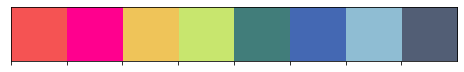

In [3]:
# Custom colors COLORES PERSONALIZADOS
class clr:
    S = '\033[1m' + '\033[90m'
    E = '\033[0m'
my_colors = ["#F55353", "#FF008E", "#EFC459", "#C8E66E", "#417D7A", "#4468B3", "#8FBDD3", "#525E75"]

print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [5]:
#IMPORTANDO LA DATA DESDE DD LOCAL
from google.colab import files
files.upload()
files.upload()

Saving housepricetrain.csv to housepricetrain.csv


Saving housepricetest.csv to housepricetest.csv


{'housepricetest.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\n1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,No

In [6]:
# Read the data
X = pd.read_csv('housepricetrain.csv', index_col='Id', sep=',', decimal='.')
X_test_full = pd.read_csv('housepricetest.csv', index_col='Id', sep=',', decimal='.')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
#Select Target
y = X.SalePrice 
#Select Predictors             
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.8,
                                                                test_size=0.2,
                                                                random_state=0)


In [7]:
X.shape

(1460, 79)

In [8]:
#demos un visazo al dataset de entrenamiento
pd.set_option('display.max_columns', None)
X_train_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48,Unf,0,1774,1822,GasA,Ex,Y,SBrkr,1828,0,0,1828,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3,774,TA,TA,Y,0,108,0,0,260,0,NaN,NaN,NaN,0,7,2007,New,Partial
871,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,Gd,N,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1962.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,CemntBd,CmentBd,BrkFace,148.0,Gd,TA,PConc,Gd,TA,No,GLQ,1218,Unf,0,350,1568,GasA,Ex,Y,SBrkr,1689,0,0,1689,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2002.0,RFn,3,857,TA,TA,Y,150,59,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal


In [9]:
#Tamaño del dataset de entrenamiento
X_train_full.shape

(1168, 79)

In [10]:
#Tamaño del dataset de validación(prueba después del entrenamiento)
X_valid_full.shape

(292, 79)

In [11]:
#Tamños del dataset donde se realizarán las predicciones
X_test_full.shape

(1459, 79)

In [12]:
#Estadísticas principales del dataset de entrenamiento
X_train_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1110.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.605308,69.614017,10589.672945,6.086473,5.572774,1970.890411,1984.692637,103.481067,439.890411,45.571918,568.049658,1053.511986,1160.958904,351.479452,6.444349,1518.882705,0.422089,0.054795,1.566781,0.384418,2.882705,1.044521,6.544521,0.612158,1978.140541,1.771404,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349
std,42.172322,22.946069,10704.180793,1.367472,1.116908,30.407486,20.684612,182.676225,435.106803,156.229962,437.569919,412.073393,373.315037,438.137938,51.200836,513.800708,0.514494,0.231409,0.546698,0.497118,0.802166,0.218441,1.624493,0.640872,24.877265,0.730041,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,0.000000,228.000000,798.750000,884.000000,0.000000,0.000000,1139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,0.000000,482.500000,992.000000,1092.000000,0.000000,0.000000,1471.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,167.750000,716.000000,0.000000,811.250000,1276.250000,1389.250000,729.000000,0.000000,1788.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,2153.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [13]:
#Mostrando valores nulos de X_train
pd.options.display.min_rows = 65 ##delimitando minimo de filas a mostrar en isnull()
miss=X_train_full.isnull().sum()

#imprimir solo las columnas con valores nulos y los muestre como porcentaje del total 
print(miss[miss>0]/(len(X_train_full.index))*100,'percent of null values')

LotFrontage     18.150685
Alley           93.921233
MasVnrType       0.513699
MasVnrArea       0.513699
BsmtQual         2.397260
BsmtCond         2.397260
BsmtExposure     2.397260
BsmtFinType1     2.397260
BsmtFinType2     2.482877
Electrical       0.085616
FireplaceQu     47.174658
GarageType       4.965753
GarageYrBlt      4.965753
GarageFinish     4.965753
GarageQual       4.965753
GarageCond       4.965753
PoolQC          99.657534
Fence           81.678082
MiscFeature     95.804795
dtype: float64 percent of null values


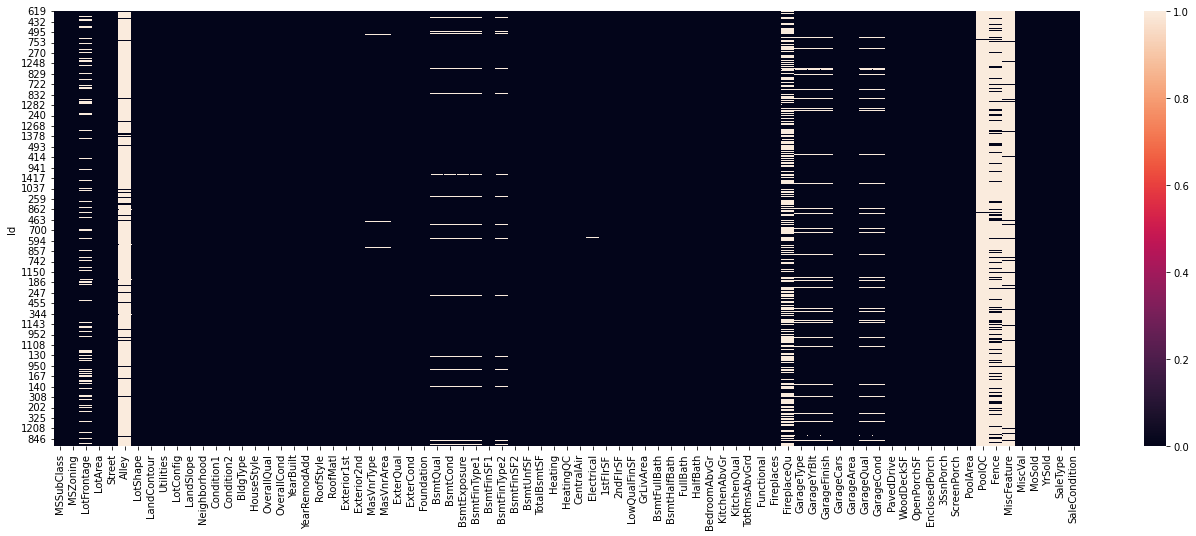

In [14]:
##Grafico tipo HEATMAP mostrando los VALORES NULOS de la TRAIN DATA(dataset de entrenamiento)
fig,ax=plt.subplots(figsize=(23,8))
sns.heatmap(X_train_full.isnull())
plt.show()

<Figure size 1656x4536 with 0 Axes>

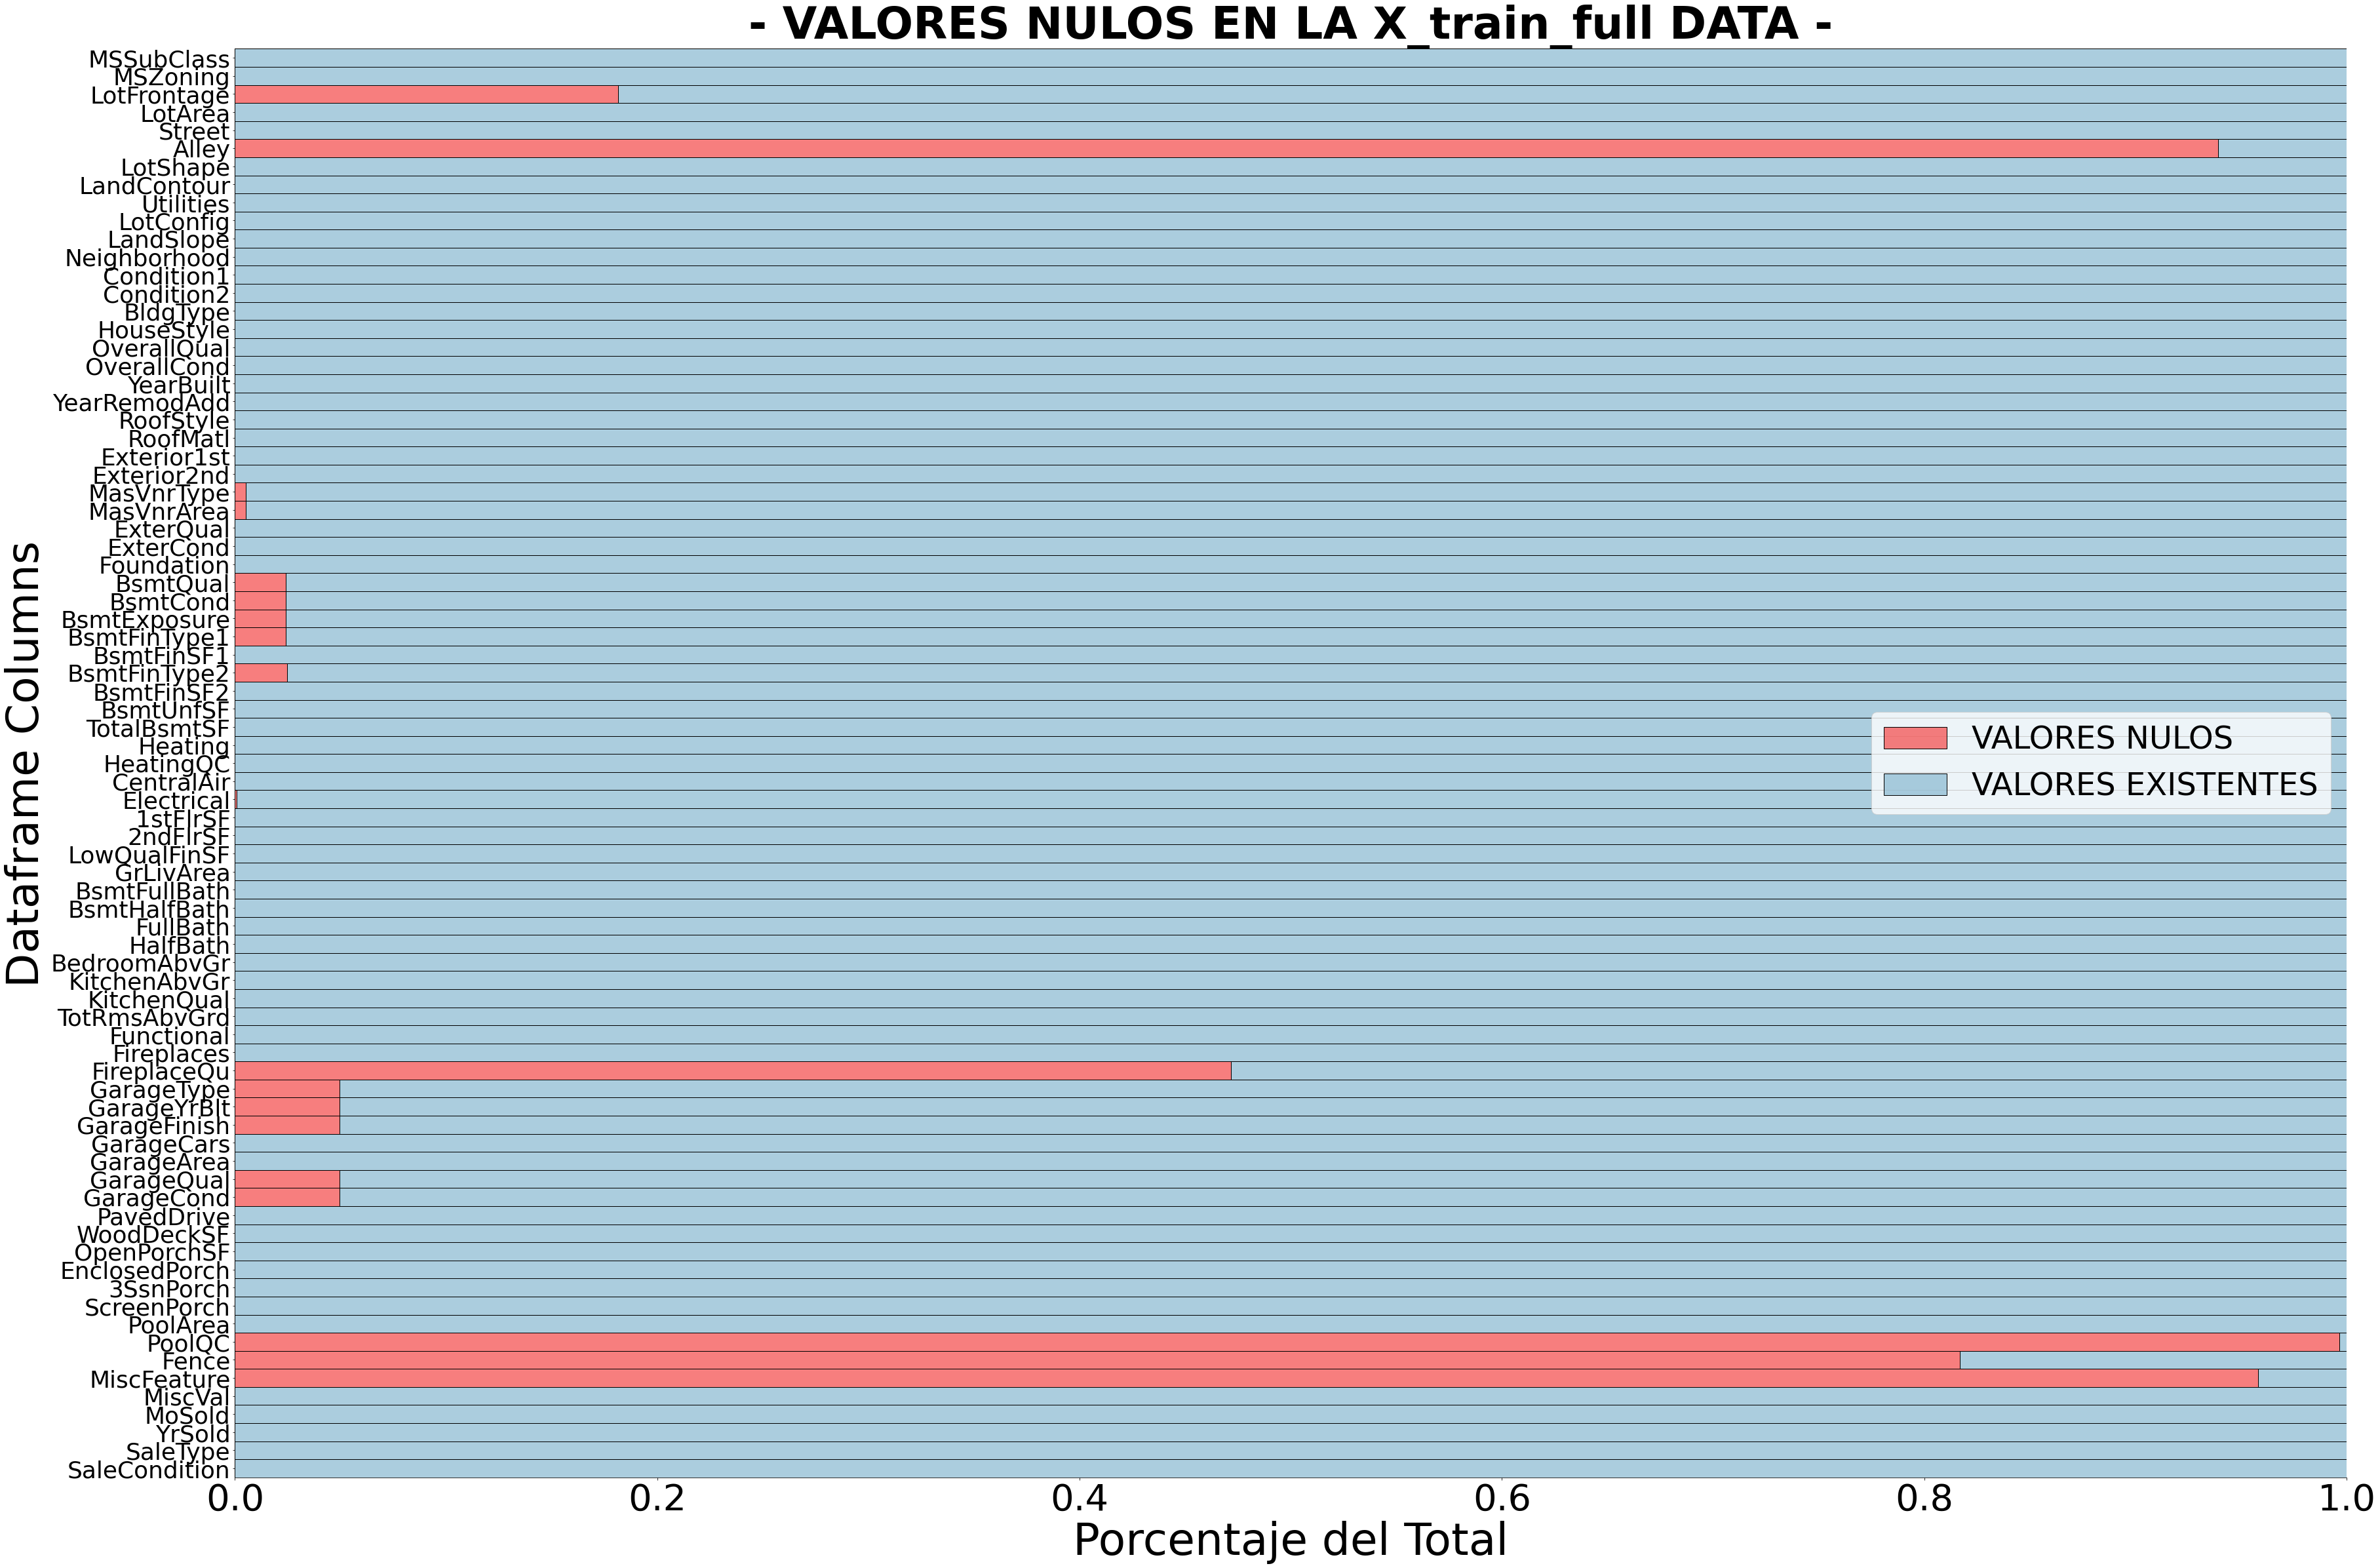

In [15]:
##GRAFICO DE BARRAS MOSTRANDO VALORES NULOS del TRAIN DATA

plt.figure(figsize=(23,63))

sns.displot(
    data=X_train_full.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    # Change aspect of the chart
    aspect=1.5,
    height=31,
    # Change colors
    palette=[my_colors[6], my_colors[0]], 
    legend=False)

plt.title("- VALORES NULOS EN LA X_train_full DATA -", size=68, weight="bold")
plt.xlabel("Porcentaje del Total", size=68)
plt.ylabel("Dataframe Columns", size=68)
plt.xticks(size=56)
plt.yticks(size=36)
plt.legend(["VALORES NULOS", "VALORES EXISTENTES"], loc=5, fontsize=48);

In [16]:
#SE HA DE TENER EN CUENTA QUE HAY QUE ELIMINAR MISMAS COLS 
#EN DATAS DE PRUEBA y APLICACION REAL(Test data)
X_train_full.drop(columns=['Alley','FireplaceQu', 'PoolQC','Fence','MiscFeature'],inplace=True)
X_test_full.drop(columns=['Alley','FireplaceQu', 'PoolQC','Fence','MiscFeature'],inplace=True)
print('estas columnas se han eliminado de ambos datasets (mismas cols en cada dataset) por tener 50% o más de valores nulos')

estas columnas se han eliminado de ambos datasets (mismas cols en cada dataset) por tener 50% o más de valores nulos


In [17]:
# Categorical columns in the training data
object_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == "object"]
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train_full[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('GarageFinish', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('GarageQual', 5),
 ('GarageCond', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('GarageType', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

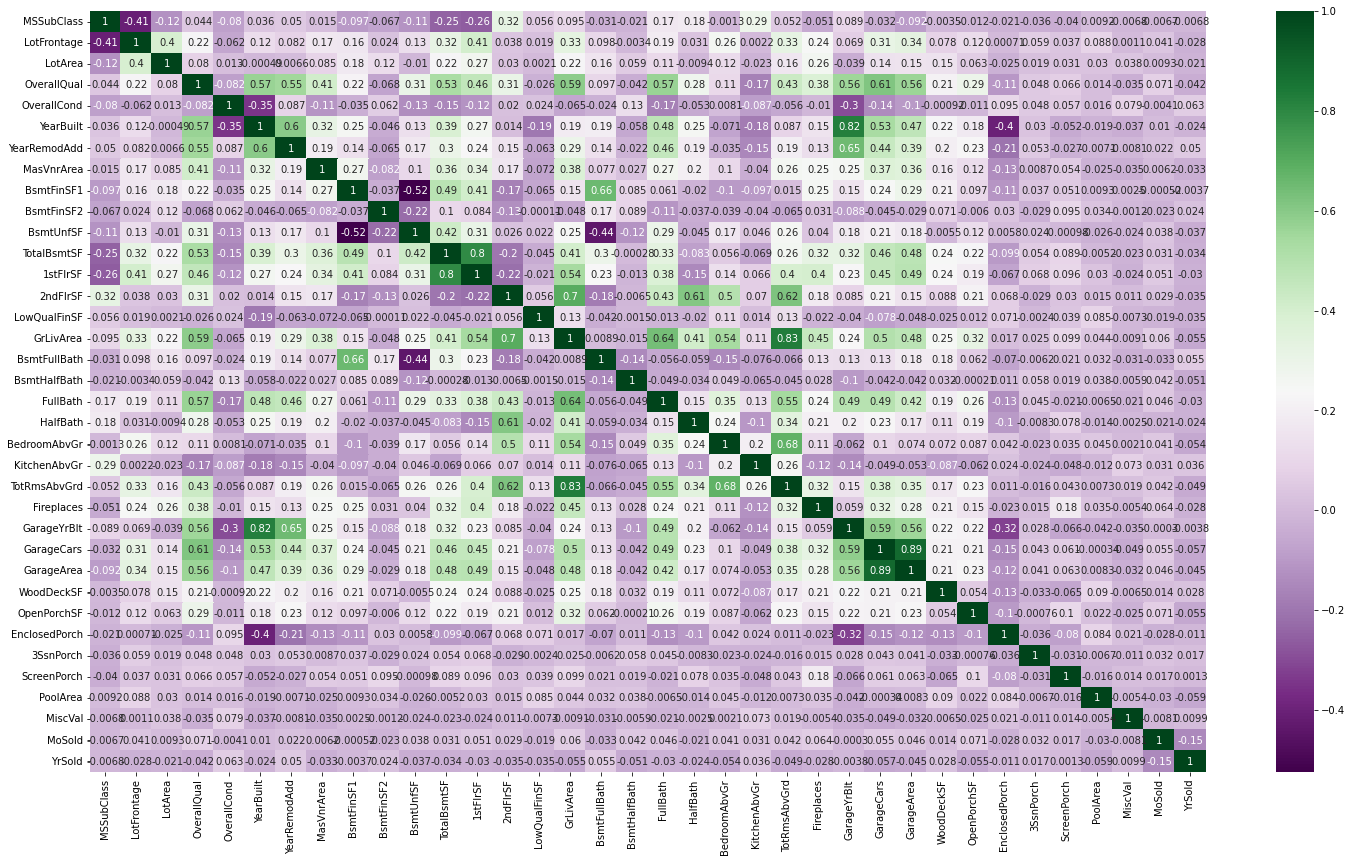

In [18]:
#Matriz de correlación entre las variables
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(25,14))
sns.heatmap(X_train_full.corr(), annot=True, cmap="PRGn")

#### **Se observan algunas fuertes correlaciones como por ejemplo entre el año de contrucción y año de construción del garage (0.82), el tamaño del área del primer piso con el tamaño del área del sótano(0.8), y entre el número de habitaciones y el tamaño del área sobre el suelo(0.82)**

In [ ]:
object_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == "object"]
# Select numeric columns
numCols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = object_cols + numCols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


In [ ]:
X_test.head(1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,730.0,140,0,0,0,120,0,0,6,2010


In [ ]:
X_train.head(1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007


In [ ]:
# Preprocessing for numerical data
from sklearn.preprocessing import StandardScaler
numerical_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Uniendo el proprecasmiento de datos numeriocs y categoricos en un solo paso
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numCols),
        ('cat', categorical_transformer, object_cols)
    ])


In [ ]:

X_train.head(1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007


In [ ]:
####PIPELINE solo se usara para el preprocesamiento cuando se usa modelo XGBoost
pipelineXGB= Pipeline(steps=[('preprocessor', preprocessor)])

# Transformacion de la data (tambien se preprocesara el dataset de validacion 
# para poder usar el pipeline en este caso particular)
X_train = pipelineXGB.fit_transform(X_train)
X_valid = pipelineXGB.transform(X_valid)

In [ ]:
X_train.head(1)

#### **para efectos de rendimiento en ajuste de hiperparámetros se divide la etapa de ajuste en 3 etapas(ajustando 2 hiperparámetros en cada etapa hasta totalizar los 6 principales para el modelo seleccionado)**

In [ ]:
#DEFINIENDO EL MODELO
model = XGBRegressor() #n_jobs=-1 para que tome todos los nucleos disponibles

#ESCOGIENDO LOS MEJORES HYPERPARAMETROS PARA EL MODELO
from sklearn.model_selection import GridSearchCV
import numpy as np
# Establezca el rango de búsqueda del parámetro xgboost em La GridSearchCV
#los 6 parámetros principales de la búsqueda de valor XGBoost
param_dist = {
        'n_estimators':range(450,900,50),
         'learning_rate':np.linspace(0.01,0.2,20),
        }

grid = GridSearchCV(model,param_dist,cv = 5,scoring = 'neg_root_mean_squared_error',n_jobs = -1)
#Entrenamiento en el set de entrenamiento
grid.fit(X_train,y_train)
#Vuelve con el mejor entrenador
best_estimator = grid.best_estimator_
print(best_estimator)


[22:46:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(learning_rate=0.060000000000000005, n_estimators=700)


In [ ]:
#DEFINIENDO EL MODELO
model = XGBRegressor(learning_rate=0.06, n_estimators=700, n_jobs=-1) #n_jobs=-1 para que tome todos los nucleos disponibles

#ESCOGIENDO LOS MEJORES HYPERPARAMETROS PARA EL MODELO
from sklearn.model_selection import GridSearchCV
import numpy as np
# Establezca el rango de búsqueda del parámetro xgboost em La GridSearchCV
#los 6 parámetros principales de la búsqueda de valor XGBoost
param_dist = {
        'max_depth':range(2,12+1,2),
         'min_child_weight':range(1,9+1,1),
        }

grid = GridSearchCV(model,param_dist,cv = 5,scoring = 'neg_root_mean_squared_error',n_jobs = -1)
#Entrenamiento en el set de entrenamiento
grid.fit(X_train,y_train)
#Vuelve con el mejor entrenador
best_estimator = grid.best_estimator_
print(best_estimator)

[01:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(learning_rate=0.06, max_depth=6, min_child_weight=3,
             n_estimators=700, n_jobs=-1)


In [ ]:
#DEFINIENDO EL MODELO
model = XGBRegressor(learning_rate=0.06, max_depth=6, min_child_weight=3, n_estimators=700, n_jobs=-1) #n_jobs=-1 para que tome todos los nucleos disponibles

#ESCOGIENDO LOS MEJORES HYPERPARAMETROS PARA EL MODELO
from sklearn.model_selection import GridSearchCV
import numpy as np
# Establezca el rango de búsqueda del parámetro xgboost em La GridSearchCV
#los 6 parámetros principales de la búsqueda de valor XGBoost
param_dist = {
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        }

grid = GridSearchCV(model,param_dist,cv = 5,scoring = 'neg_root_mean_squared_error',n_jobs = -1)
#Entrenamiento en el set de entrenamiento
grid.fit(X_train,y_train)
#Vuelve con el mejor entrenador
best_estimator = grid.best_estimator_
print(best_estimator)

[20:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(colsample_bytree=0.7666666666666666, learning_rate=0.06,
             max_depth=6, min_child_weight=3, n_estimators=700, n_jobs=-1,
             subsample=0.7736842105263158)


In [ ]:
#YA TENIENDO PRIMER MODELO A EVALUAR
model = XGBRegressor(colsample_by_tree=0.77,learning_rate=0.06, max_depth=6, min_child_weight=3, n_estimators=700, n_jobs=-1, subsample=0.77)
#definiendo el entrenamiento del modelo
model.fit(X_train, y_train)

[19:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_by_tree=0.77, learning_rate=0.06, max_depth=6,
             min_child_weight=3, n_estimators=700, n_jobs=-1, subsample=0.77)

In [ ]:
#Evaluando XGBoost con los primeros parametros
predictions_1 = model.predict(X_valid)
print("Mean Absolute Error(MAE): " + str(mean_absolute_error(predictions_1, y_valid)))
print("Root Mean Squared Error(RMSE): " + str(mean_squared_error(predictions_1, y_valid, squared=False))) 

Mean Absolute Error(MAE): 15488.038754815925
Root Mean Squared Error(RMSE): 27246.22954891747


In [ ]:
####PIPELINE solo se usara para el preprocesamiento DATATEST cuando se usa modelo XGBoost
pipelineXGB= Pipeline(steps=[('preprocessor', preprocessor)])

# Transformacion de la data (tambien se preprocesara el dataset de predicción final 
# para poder usar el pipeline en este caso particular)
X_test = pipelineXGB.transform(X_test)


In [ ]:
#PREDICCIONES PARA COMPETENCIA
preds_test7= model.predict(X_test)


In [ ]:
# Grabando las predicciones en un archivo
output = pd.DataFrame({'Id':range(1461,2920,1),
                       'SalePrice': preds_test7})
output.to_csv('submission7.csv', index=False)
files.download('submission7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>